In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statistics
from matplotlib import pyplot
import math
import re

In [7]:
dataset = pd.read_csv('/Users/Help/Downloads/seeds_dataset.txt', sep = '\s+', header = None, engine = 'python')
dataset.columns =['Area','Perimeter','Compactness','Length of kernel','Width of kernel','Asymmetry coefficient','Length of kernel groove', 'Class']

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [9]:
dataset.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [10]:
dataset.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [12]:
dataset1 = dataset[dataset['Class']==1]
dataset2 = dataset[dataset['Class']==2]
dataset3 = dataset[dataset['Class']==3]

In [13]:
dataset1.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,14.334429,14.294286,0.880070,5.508057,3.244629,2.667403,5.087214,1.0
std,1.215704,0.576583,0.016191,0.231508,0.177616,1.173901,0.263699,0.0
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000,1.0
25%,13.750000,13.960000,0.868850,5.384500,3.134250,1.826500,4.924500,1.0
50%,14.355000,14.320000,0.880500,5.534000,3.243500,2.545500,5.094000,1.0
75%,15.045000,14.732500,0.890400,5.677000,3.378500,3.301000,5.223500,1.0
max,17.080000,15.460000,0.918300,6.053000,3.683000,6.685000,5.877000,1.0


In [14]:
dataset2.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,18.334286,16.135714,0.883517,6.148029,3.677414,3.644800,6.020600,2.0
std,1.439496,0.616995,0.015500,0.268191,0.185539,1.181868,0.253934,0.0
min,15.380000,14.660000,0.845200,5.363000,3.231000,1.472000,5.144000,2.0
25%,17.330000,15.737500,0.872525,5.979250,3.554250,2.845500,5.877500,2.0
50%,18.720000,16.210000,0.882600,6.148500,3.693500,3.609500,5.981500,2.0
75%,19.137500,16.557500,0.898225,6.312000,3.804750,4.436000,6.187750,2.0
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,2.0


In [15]:
dataset3.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,11.873857,13.247857,0.849409,5.229514,2.853771,4.788400,5.116400,3.0
std,0.723004,0.340196,0.021760,0.138015,0.147516,1.336465,0.162068,0.0
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.661000,4.745000,3.0
25%,11.262500,13.002500,0.834000,5.136250,2.725500,4.048750,5.002000,3.0
50%,11.835000,13.250000,0.849350,5.224000,2.834500,4.839000,5.091500,3.0
75%,12.425000,13.470000,0.861825,5.323750,2.967000,5.467250,5.228500,3.0
max,13.370000,13.950000,0.897700,5.541000,3.232000,8.456000,5.491000,3.0


In [17]:
np.corrcoef(dataset['Area'],dataset['Perimeter'])

array([[1.        , 0.99434093],
       [0.99434093, 1.        ]])

In [19]:
np.corrcoef(dataset1['Area'], dataset1['Perimeter'])

array([[1.        , 0.97643665],
       [0.97643665, 1.        ]])

In [20]:
np.corrcoef(dataset2['Area'], dataset2['Perimeter'])

array([[1.        , 0.97580591],
       [0.97580591, 1.        ]])

In [21]:
np.corrcoef(dataset3['Area'], dataset3['Perimeter'])

array([[1.        , 0.90760103],
       [0.90760103, 1.        ]])

In [23]:
meanset1=dataset1.describe().mean()
meanset2=dataset2.describe().mean()
meanset3=dataset3.describe().mean()
datasetcopy=dataset.copy()

In [24]:
datasetcopy['meanset1_dist'] = np.sqrt(np.square(datasetcopy['Area']-meanset1[0])+np.square(datasetcopy['Perimeter']-meanset1[1])+np.square(datasetcopy['Compactness']-meanset1[2])+np.square(datasetcopy['Length of kernel']-meanset1[3])+np.square(datasetcopy['Width of kernel']-meanset1[4])+np.square(datasetcopy['Asymmetry coefficient']-meanset1[5])+np.square(datasetcopy['Length of kernel groove']-meanset1[6]))

In [25]:
datasetcopy['meanset2_dist'] = np.sqrt(np.square(datasetcopy['Area']-meanset2[0])+np.square(datasetcopy['Perimeter']-meanset2[1])+np.square(datasetcopy['Compactness']-meanset2[2])+np.square(datasetcopy['Length of kernel']-meanset2[3])+np.square(datasetcopy['Width of kernel']-meanset2[4])+np.square(datasetcopy['Asymmetry coefficient']-meanset2[5])+np.square(datasetcopy['Length of kernel groove']-meanset2[6]))

In [26]:
datasetcopy['meanset3_dist'] = np.sqrt(np.square(datasetcopy['Area']-meanset3[0])+np.square(datasetcopy['Perimeter']-meanset3[1])+np.square(datasetcopy['Compactness']-meanset3[2])+np.square(datasetcopy['Length of kernel']-meanset3[3])+np.square(datasetcopy['Width of kernel']-meanset3[4])+np.square(datasetcopy['Asymmetry coefficient']-meanset3[5])+np.square(datasetcopy['Length of kernel groove']-meanset3[6]))

In [27]:
datasetcopy.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class,meanset1_dist,meanset2_dist,meanset3_dist
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,19.006471,21.095430,19.010458
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,19.916383,22.034079,19.959386
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,19.542951,21.772935,19.382328
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,19.887018,22.165601,19.714023
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,19.153716,21.115943,19.317182


In [28]:
datasetcopy.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class,meanset1_dist,meanset2_dist,meanset3_dist
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000,18.826205,20.936984,18.680397
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448,1.464409,1.845710,1.180389
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000,15.531803,16.591792,15.794771
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000,17.526955,19.218130,17.620641
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000,19.195114,21.369651,18.923794
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000,19.934518,22.422322,19.547588
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000,21.565607,24.111410,21.116458


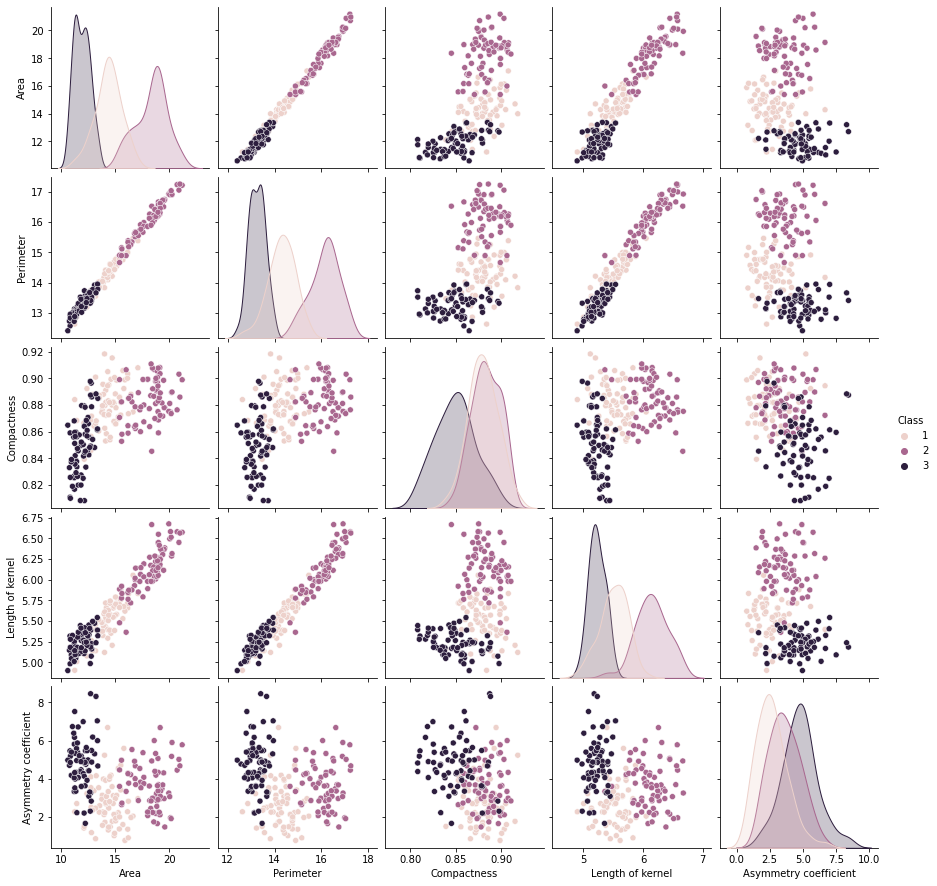

In [33]:
sns.pairplot(dataset, hue = "Class", vars=["Area", "Perimeter", "Compactness","Length of kernel","Asymmetry coefficient"])


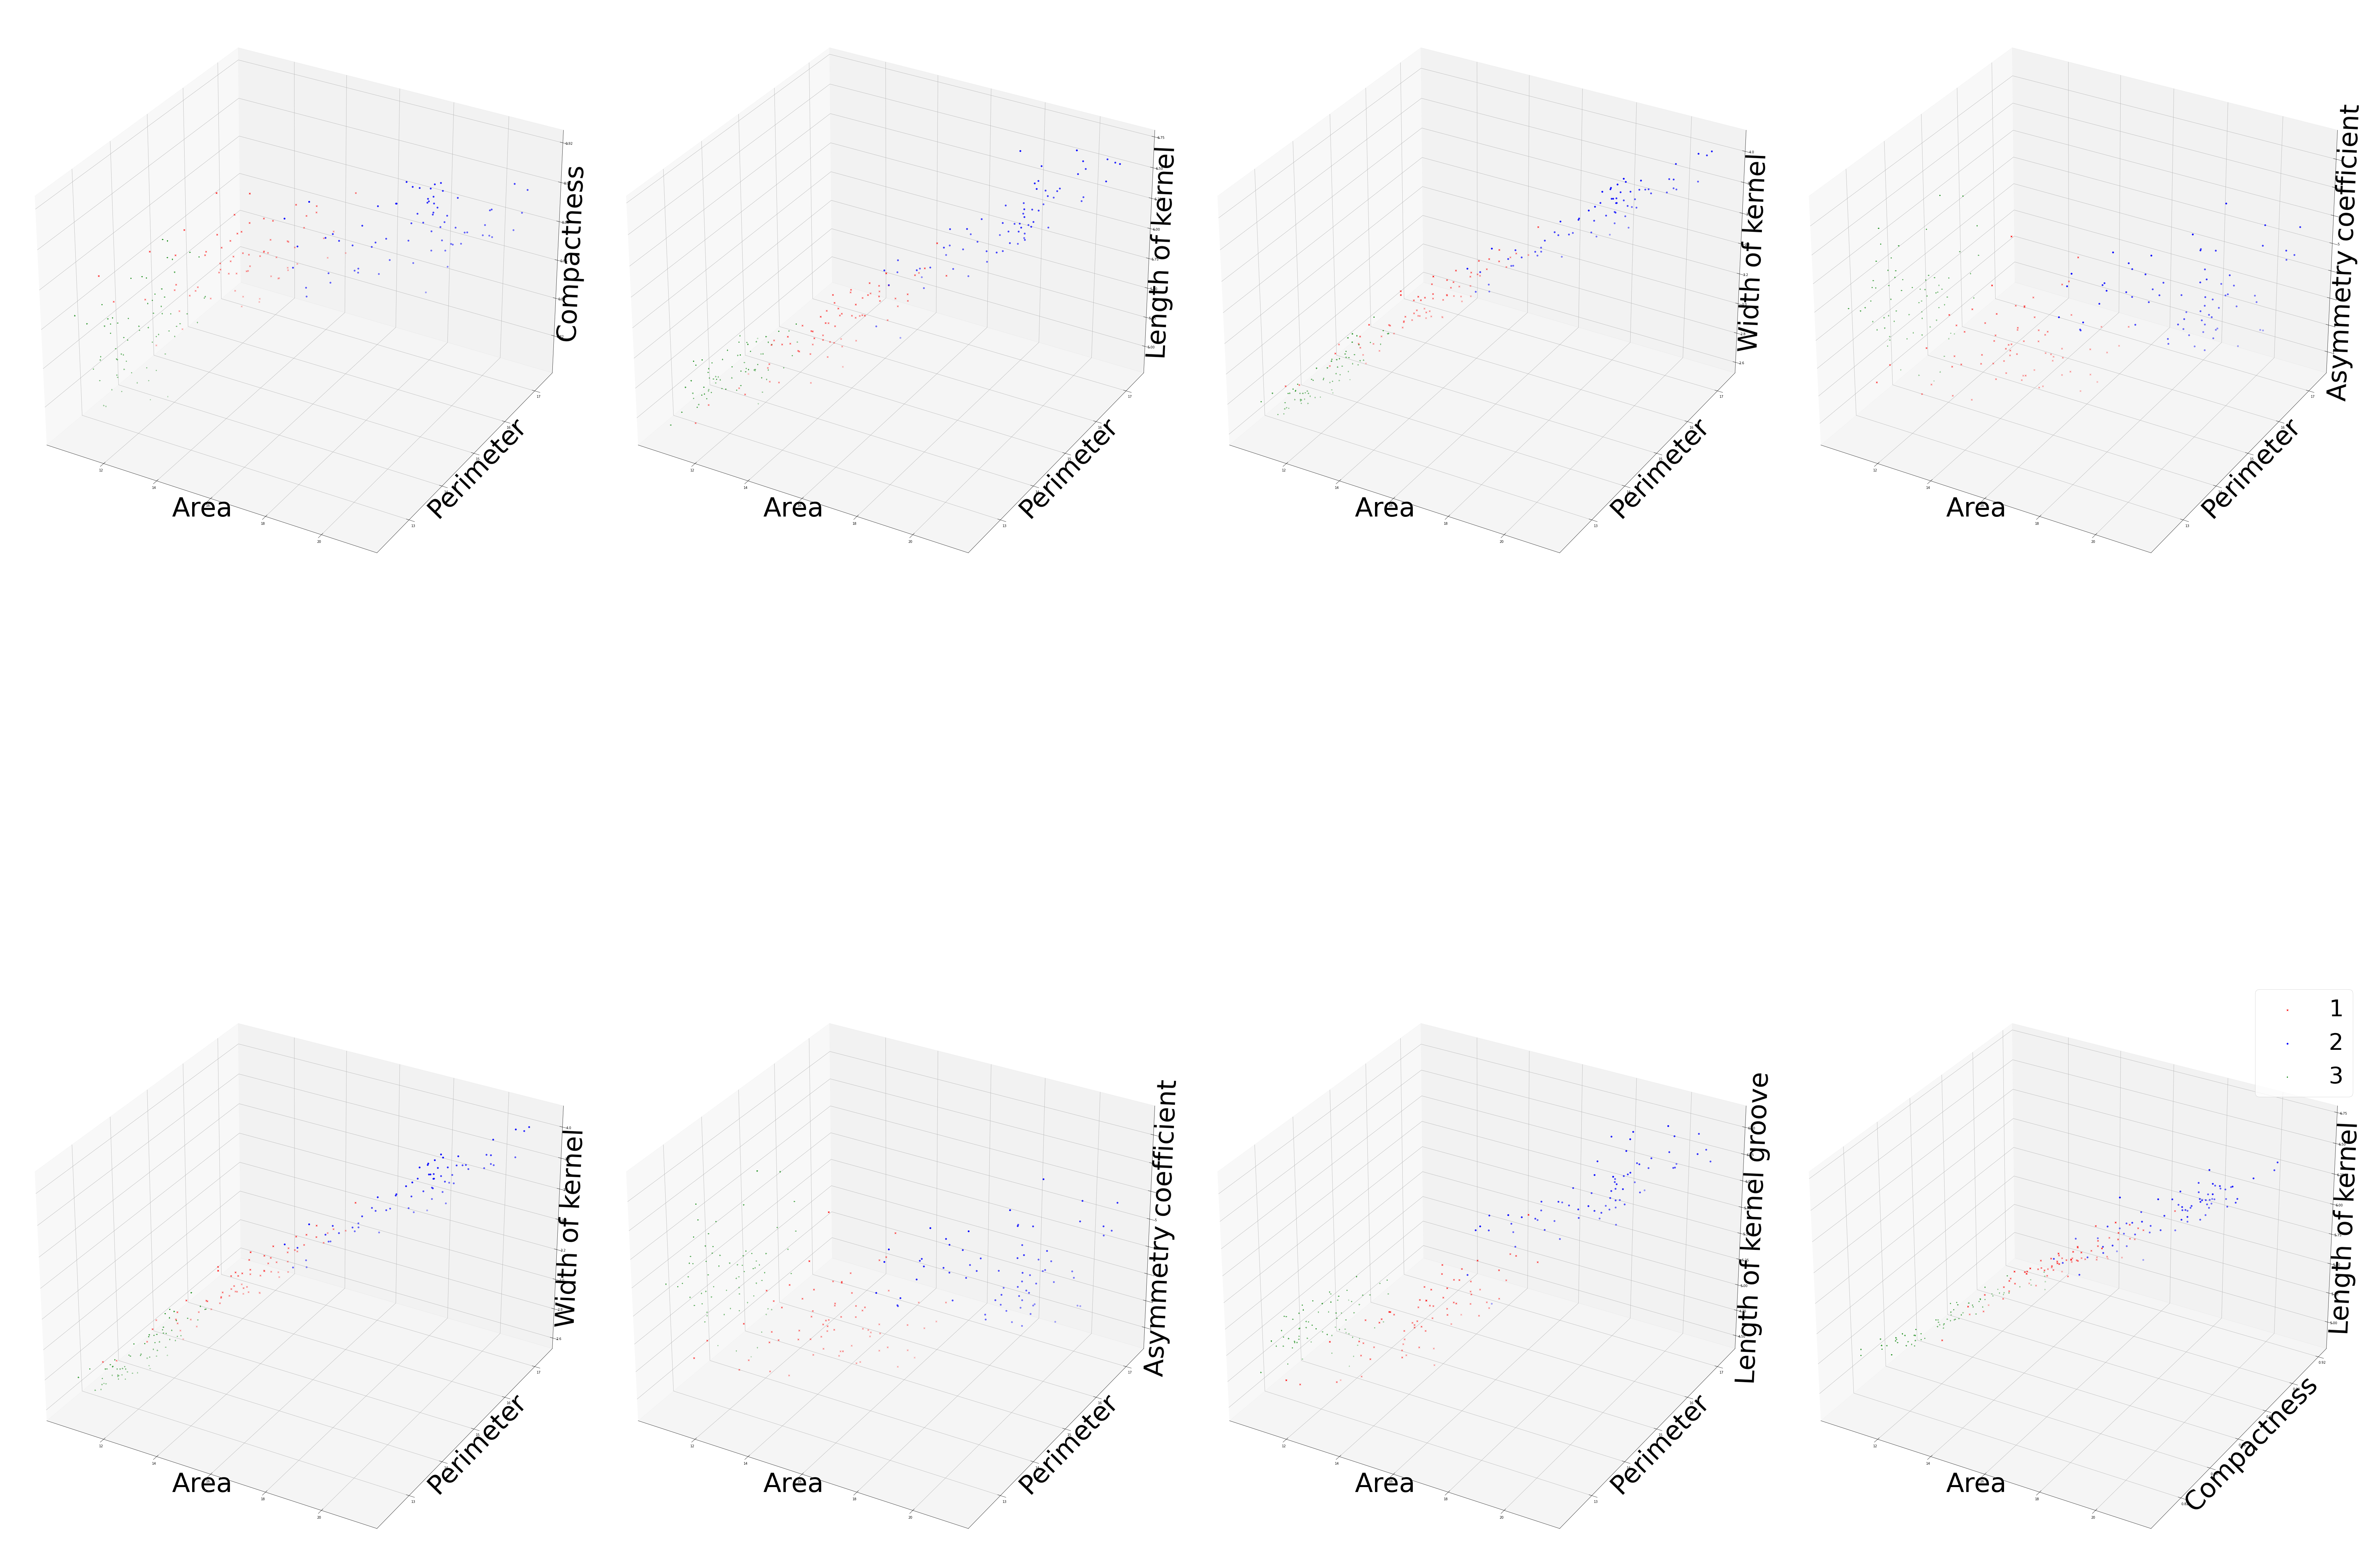

In [30]:
from mpl_toolkits.mplot3d import Axes3D

Class = list(dataset.columns)
Class.remove("Class")
comb = list(itertools.combinations(Class, 3))

fig, axs = plt.subplots(2, 4, subplot_kw={'projection':'3d'}, figsize=(100,100))


for i in range(0, 2):
    for j in range(0,4):
        axs[i,j].scatter(dataset[dataset["Class"] == 1][comb[(2*i+j)][0]],
                    dataset[dataset["Class"] ==1][comb[(2*i+j)][1]],
                    dataset[dataset["Class"] == 1][comb[(2*i+j)][2]],    
                    c = "red", marker = "x", label='1')
        
        axs[i,j].scatter(dataset[dataset["Class"] == 2][comb[(2*i+j)][0]],
                    dataset[dataset["Class"] == 2][comb[(2*i+j)][1]],
                    dataset[dataset["Class"] == 2][comb[(2*i+j)][2]],
                    c = "blue", marker = "o", label='2')

        axs[i,j].scatter(dataset[dataset["Class"] == 3][comb[(2*i+j)][0]],
                    dataset[dataset["Class"] == 3][comb[(2*i+j)][1]],
                    dataset[dataset["Class"] == 3][comb[(2*i+j)][2]],
                    c = "green", marker = "+", label='3')
        

    
        axs[i,j].set_xlabel(comb[(2*i+j)][0], fontsize=80)
        axs[i,j].set_ylabel(comb[(2*i+j)][1], fontsize=80)
        axs[i,j].set_zlabel(comb[(2*i+j)][2], fontsize=80)
        
plt.legend(prop={'size': 70})

plt.tight_layout()

Text(0, 0.5, 'Number of records')

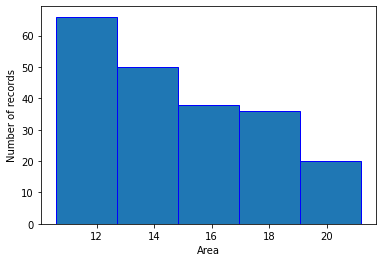

In [32]:
plt.hist(dataset["Area"], bins = 5, edgecolor = "blue")
plt.xlabel("Area")
plt.ylabel("Number of records")

In [ ]:
 Discusion:
subsets of the data to only include individual classes, we then described each subset to get the various mathematical statistics of each column.